In [21]:
import numpy as np
from matplotlib import pyplot as plt

import utils
from decoder import Decoder
from jit_bfencoder import JitedBruteForceEncoder
from bf_encoder import BruteForceEncoder

In [22]:
# img_path = '../imgs/raw/cauliflower_64x64_colored.png'
# img_path = '../imgs/raw/cauliflower_128x128_colored.png'
img_path = '../imgs/raw/cauliflower_256x256_colored.png'
img = utils.load_grayscale(img_path)

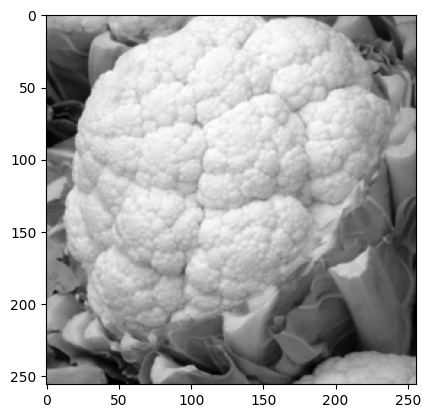

In [31]:
plt.imshow(img, cmap='gray')
plt.show()

In [24]:
encoder = BruteForceEncoder(img)
# encoded = encoder.encode()

In [25]:
encoder = JitedBruteForceEncoder(img)
encoded, errs = encoder.encode()

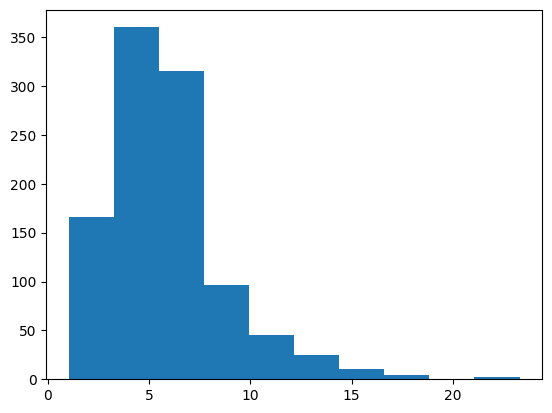

In [26]:
plt.hist(errs)
plt.show()

In [27]:
for dom in encoded.domains:
    print(dom)

Domain(start_i=169, start_j=104, orientation=1, rotation=2, s=-0.4649290321493816, o=249.0713894951358)
Domain(start_i=207, start_j=139, orientation=0, rotation=3, s=0.47014301267383896, o=106.03915656011914)
Domain(start_i=235, start_j=212, orientation=0, rotation=2, s=1.1313110216920625, o=-5.268134385436241)
Domain(start_i=231, start_j=222, orientation=1, rotation=1, s=0.24960461026952188, o=149.15028632990536)
Domain(start_i=204, start_j=185, orientation=1, rotation=0, s=1.0314992797293123, o=105.08915612966408)
Domain(start_i=179, start_j=89, orientation=1, rotation=1, s=0.7113068275596471, o=53.27299296876433)
Domain(start_i=0, start_j=200, orientation=1, rotation=1, s=-0.3748568241840176, o=235.64304358973087)
Domain(start_i=224, start_j=21, orientation=0, rotation=2, s=-0.3101365205811994, o=205.03631467437896)
Domain(start_i=130, start_j=234, orientation=1, rotation=0, s=-0.2982486363815838, o=183.00753078420132)
Domain(start_i=23, start_j=44, orientation=1, rotation=0, s=-0.2

In [28]:
decoder = Decoder()

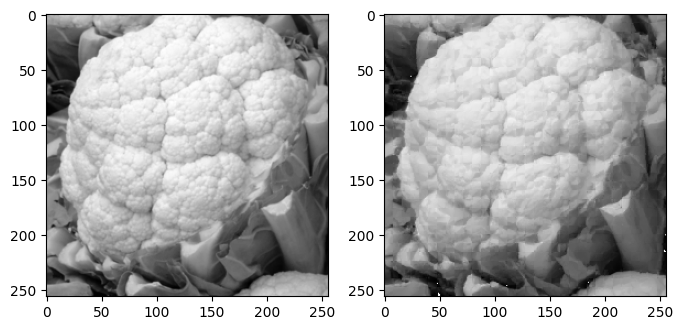

err: 1931.2560679516323


In [29]:
decoded = Decoder().decode(encoded, 128)
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(decoded, cmap='gray')
plt.show()
print(f'err: {np.linalg.norm(img.astype(np.int32) - decoded.astype(np.int32))}')

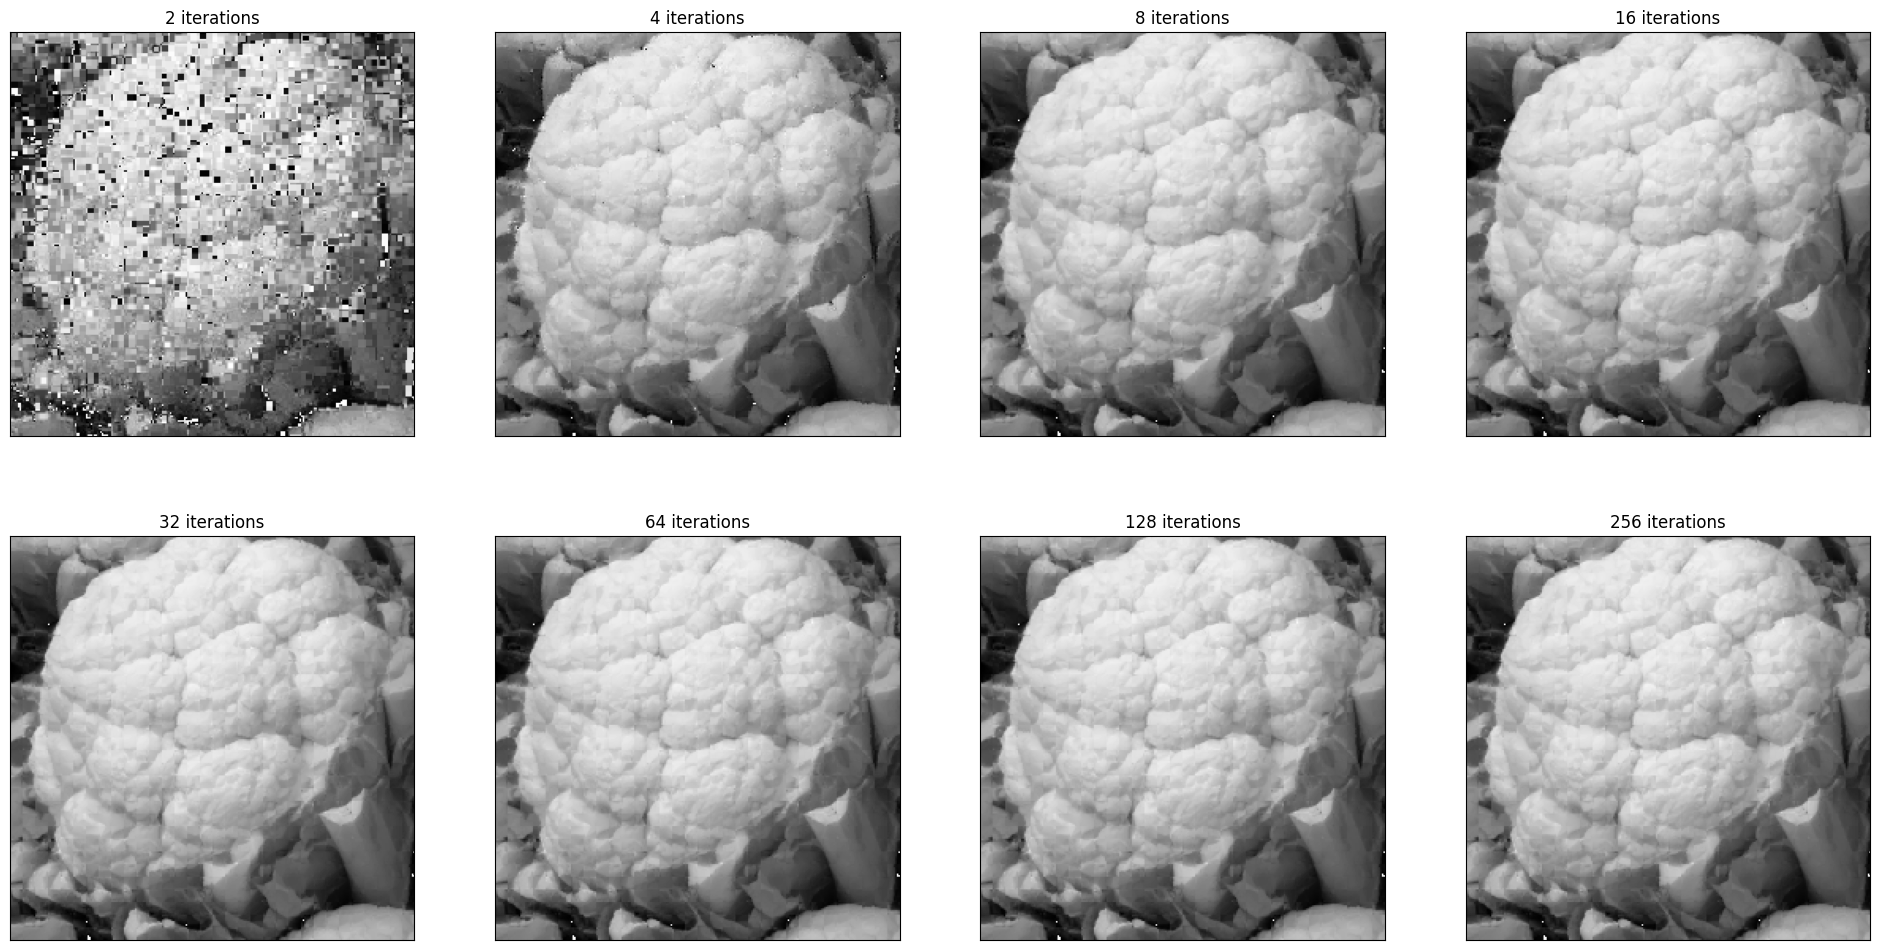

In [34]:
iters = [2, 4, 8, 16, 32, 64, 128, 256]
fig, axs = plt.subplots(2, 4, figsize=(24, 12))
errs = []
for i, it_num in enumerate(iters):
    decoded = Decoder().decode(encoded, it_num)
    ax = axs[i//4][i%4]
    ax.imshow(decoded, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'{it_num} iterations')
    errs.append(np.linalg.norm(img.astype(np.int32) - decoded.astype(np.int32)))

plt.show()

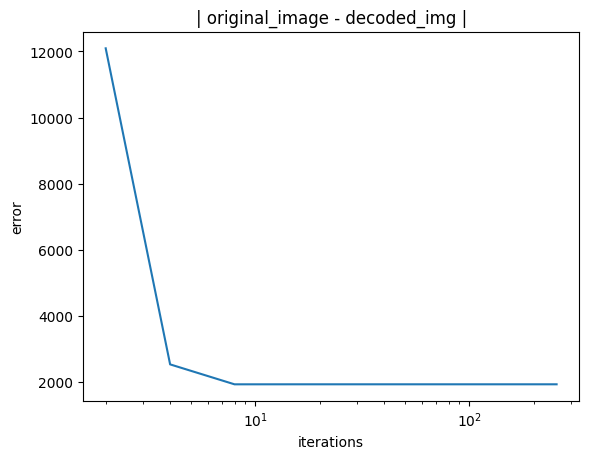

In [39]:
plt.plot(iters, errs)
plt.title("| original_image - decoded_img |")
plt.ylabel('error')
plt.xlabel('iterations')
plt.xscale('log')
plt.show()